In [3]:
import os
import pandas as pd
import numpy as np
import glob
import pyarrow.feather as feather

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
scale = preprocessing.MinMaxScaler()
pd.set_option("display.max_rows", None)


def label_encoding(df, columns_list):
    for col in columns_list:
        df[col] = le.fit_transform(df[col])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        with open('Label_mapping_nonvpn.txt', 'a') as data:
            data.write(col+": "+str(le_name_mapping) + "\n")
    return df


def data_scale(df):
    df.loc[:, '0': '127'] = df.loc[:, '0': '127'] / 255.0
    df[['total_packet_lenght']] = scale.fit_transform(
        df[['total_packet_lenght']])
    return df


def remove_protocol(df, list_protocol):
    df = df.loc[~df['protocol'].isin(list_protocol)]
    return df


def remove_hello(df):
    df = df[~df['info'].str.contains('Hello|Handshake|Cert')]
    return df


def final_remove(df):
    df = df.drop(['ip_src', 'ip_dst',
                 'info', 'data'], axis=1)
    return df


# Chat

In [4]:
# get your working directory and target folder that contains all your files
path = os.path.join(
    os.getcwd(), '/home/onos/FL/Data Processing/rawds/nonvpn/Chat')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Chat = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Chat = pd.read_csv(file, engine='pyarrow')
    _df_Chat['Label'] = "Chat"
    file_name = file.split('/')
    _df_Chat['File_name'] = file_name[-1]
    df_Chat = pd.concat([df_Chat, _df_Chat])
del _df_Chat


In [5]:
remove_protocols = ['SSL', 'X11', 'XMPP/XML', 'OCSP', 'SSLv2','VNC','ICMP','SPOOLSS','SSLv3']


In [6]:
df_Chat = df_Chat.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [7]:
df_Chat.shape


(3747, 8)

In [8]:
df_Chat.to_csv(
    "nonvpn_csv/df_Chat.csv", index=False)
del df_Chat


# Email

In [9]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/nonvpn/Email')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Email = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Email = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_Email['Label'] = "Email"
    file_name = file.split('/')
    _df_Email['File_name'] = file_name[-1]
    df_Email = pd.concat([df_Email, _df_Email])
del _df_Email


/home/onos/FL/Data Processing/rawds/nonvpn/Email/email2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Email/email1a.csv


In [10]:
df_Email = df_Email.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [11]:
df_Email.shape


(2754, 8)

In [12]:
df_Email.to_csv("nonvpn_csv/df_Email.csv", index=False)
del df_Email


# FileTransfer

In [13]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/nonvpn/FileTransfer')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_FileTransfer = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_FileTransfer = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_FileTransfer['Label'] = "FileTransfer"
    file_name = file.split('/')
    _df_FileTransfer['File_name'] = file_name[-1]
    df_FileTransfer = pd.concat([df_FileTransfer, _df_FileTransfer])
del _df_FileTransfer


/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpDown4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/sftpDown1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/sftpUp1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpUp2.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/ftps_up_2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/skype_file6.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpUp3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpDown1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpDown3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/skype_file5.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpDown6.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/sftpDown2.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/skype_file3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/FileTransfer/scpUp1.csv
/home/onos/FL/Data Processin

In [14]:
df_FileTransfer = df_FileTransfer.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [15]:
df_FileTransfer.to_csv("nonvpn_csv/df_FileTranfer.csv", index=False)
del df_FileTransfer


# Streaming

In [16]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/nonvpn/Streaming')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_Streaming = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_Streaming = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_Streaming['Label'] = "Streaming"
    file_name = file.split('/')
    _df_Streaming['File_name'] = file_name[-1]
    df_Streaming = pd.concat([df_Streaming,_df_Streaming])
del _df_Streaming


/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube6.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/netflix4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/netflix1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/skype_video1a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube5.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/netflix3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/facebook_video2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/hangouts_video2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/skype_video2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube2.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/youtube3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming/vimeo3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/Streaming

In [17]:
df_Streaming = df_Streaming.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [18]:
df_Streaming.to_csv(
    "nonvpn_csv/df_Streaming.csv", index=False)
del df_Streaming


# VoIP

In [19]:
# get your working directory and target folder that contains all your files
path = os.path.join(os.getcwd(), 'rawds/nonvpn/VoIP')

files = [os.path.join(path, i) for i in os.listdir(
    path) if os.path.isfile(os.path.join(path, i))]

df_VoIP = pd.DataFrame()

# for every file in folder, read it and append to a empty dataframe with column filename as 'Label'
for file in files:
    _df_VoIP = pd.read_csv(file, engine='pyarrow')
    print(file)
    _df_VoIP['Label'] = "VoIP"
    file_name = file.split('/')
    _df_VoIP['File_name'] = file_name[-1]
    df_VoIP = pd.concat([df_VoIP,_df_VoIP])
del _df_VoIP


/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/hangouts_audio3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/facebook_audio2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/skype_audio3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/spotify3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/facebook_audio1a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/skype_audio2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/hangouts_audio4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/spotify4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/spotify2.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/spotify1.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/facebook_audio4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/facebook_audio3.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/hangouts_audio2a.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/skype_audio4.csv
/home/onos/FL/Data Processing/rawds/nonvpn/VoIP/skype_audio1a.csv
/home/onos/FL/D

In [20]:
df_VoIP = df_VoIP.pipe(remove_protocol,remove_protocols).pipe(remove_hello).pipe(final_remove)

In [21]:
df_VoIP.shape

(21474, 8)

In [22]:
df_VoIP.to_csv(
    "nonvpn_csv/df_VoIP.csv", index=False)
del df_VoIP


# Final

In [23]:
path = os.path.join(os.getcwd(),  '/home/onos/FL/Data Processing/nonvpn_csv')
all_files = glob.glob(os.path.join(path, "*.csv"))
df_nonvpn = pd.concat((pd.read_csv(f,engine='pyarrow') for f in all_files), ignore_index=True)


In [24]:
import matplotlib.pyplot as plt


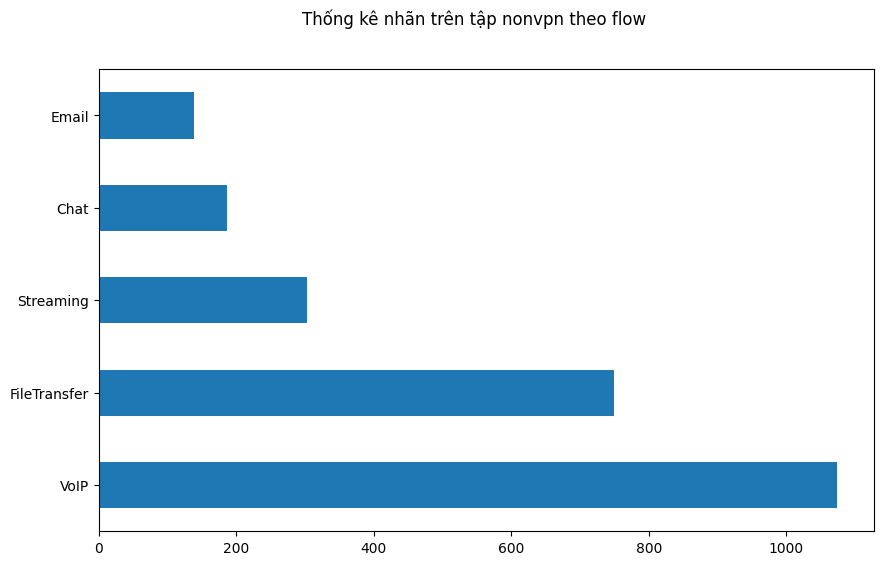

In [29]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Thống kê nhãn trên tập nonvpn theo flow")
(df_nonvpn.Label.value_counts()/20).round(0).plot(kind='barh')
plt.savefig('image/nonvpn_label_flow.png')


In [31]:
(df_nonvpn.Label.value_counts()/20).round(0)

VoIP            1074.0
FileTransfer     749.0
Streaming        302.0
Chat             187.0
Email            138.0
Name: Label, dtype: float64

In [366]:
df_nonvpn.columns

Index(['time_epoch', 'frame_number', 'stream_id', 'ip_proto', 'protocol',
       'length', '0', '1', '2', '3',
       ...
       '1452', '1453', '1454', '1455', '1456', '1457', '1458', '1459', 'Label',
       'File_name'],
      dtype='object', length=1468)

In [367]:
df_nonvpn = df_nonvpn.pipe(label_encoding,['protocol', 'Label'])

In [368]:
from sklearn.model_selection import train_test_split

train, test_case = train_test_split(df_nonvpn, test_size=0.2)

train = train.drop(['time_epoch', 'frame_number', 'File_name'],axis=1)
train, test = train_test_split(train, test_size=0.2)
train = train.drop(['stream_id'],axis=1)
train.to_csv("nonvpn_data.csv", index=False)
test.to_csv("nonvpn_test.csv", index=False)

In [369]:
test_case = test_case[['time_epoch', 'frame_number', 'stream_id', 'length', 'Label', 'File_name']]
split = 5
total_data_count = test_case.shape[0]
data_per_set = int(np.floor(total_data_count/split))
DataFrameDict = {}
for i in range(1, split+1):
    client_name = "client_" + str(i)
    start = data_per_set * (i-1)
    end = data_per_set * i

    print(f"Adding data from {start} to {end} for client : {client_name}")
    DataFrameDict[client_name] = test_case[start:end]
for df in DataFrameDict.keys():
    csv_path = "nonvpn_test_case/"+df + ".csv"
    DataFrameDict[df].to_csv(csv_path,index=False)


Adding data from 0 to 1960 for client : client_1
Adding data from 1960 to 3920 for client : client_2
Adding data from 3920 to 5880 for client : client_3
Adding data from 5880 to 7840 for client : client_4
Adding data from 7840 to 9800 for client : client_5


In [370]:
# index = 0
# with pd.read_csv("nonvpn_data.csv", chunksize=1000000) as reader:
#     for data in reader:
#         path = '/home/onos/FL/Data Processing/nonvpn_arrow/nonvpn_data({}).arrow'.format(index)
#         feather.write_feather(data, path)
#         index += 1


In [371]:
# df_nonvpn.info()
# df_nonvpn.head(2)
# df_nonvpn = df_nonvpn.astype('float16')
# df_nonvpn.head(2)


In [372]:
# df_nonvpn.info()


In [373]:
# df_nonvpn["Label"] = df_nonvpn["Label"].astype("int8")


In [374]:
# df_nonvpn.info()


In [375]:
# df = pd.read_csv("iris.csv")


In [376]:
# df.info()


In [377]:
# df = (df.pipe(label_encoding, ['variety']))


In [378]:
# df.info()


In [379]:
# df.to_csv("iris.csv")
